<h1>Лучшие книги по продажам 2024-2025 (Всероссийский книжный рейтинг)<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import openpyxl

<h2>1. Загрузка данных

<b>Для сравнительного анализа самых популярных книг у покупателей потребуются 2 датасета: Всероссийский книжный рейтинг 2024 (ТОП-50: лидеры продаж за период с 1 января по 31 декабря 2024) и Всероссийский книжный рейтинг 2025 (ТОП-50: лидеры продаж за период с 1 января по 30 июня 2025).
Из вышеуказанных рейтингов исключены учебные пособия, школьные учебники и юридические справочники.

In [2]:
rating_2024=pd.read_excel("rating 2024.xlsx")
rating_2025=pd.read_excel("rating 2025.xlsx")

In [3]:
rating_2024.head()

,№,Зарубежный / Отечественный автор,Худлит / Нонфикшн / Детская,Автор,Название книги,Издательство,ISBN,Год выпуска
0,1,Отечественный,Нонфик,Ольга Примаченко,"К себе нежно. Книга о том, как ценить и беречь...",Бомбора,"978-5-041-17369-2, 978-5-043-06156-0, 978-5-04...",2020
1,2,Отечественный,Нонфик,Николай Цискаридзе,Мой театр. Книга 1,АСТ,978-5-171-46132-4,2022
2,3,Отечественный,Худлит,Анна Джейн,Восхитительная ведьма. Книга первая,Clever/Selfpub,978-5-001-54276-6,2020
3,4,Отечественный,Худлит,Мариам Петросян,"Дом, в котором…",Лайвбук/Эвербук,978-5-907-42869-0,2023
4,5,Зарубежный,Нонфик,Джеймс Клир,Атомные привычки. Как приобрести хорошие привы...,Питер,978-5-446-14117-3,2024


In [4]:
rating_2025.head()

,№,Зарубежный / Отечественный автор,Обложка,Автор,Название книги,Издательство,Худлит/Нонфик/Детская,Итого
0,1,Зарубежный,Твердая,Ребекка Яррос,Ониксовый шторм,О2,Худлит,54396254.1
1,2,Зарубежный,Твердая,Роберт Грин,48 законов власти,Рипол Классик,Нонфик,43263158.3
2,3,Зарубежный,Твердая,-,The Book. Как создать цивилизацию заново,МИФ,Нонфик,39955075.000001
3,4,Зарубежный,Мягкая,Гэнки Кавамура,Если все кошки в мире исчезнут,Бомбора,Нонфик,33005527.08
4,5,Зарубежный,Твердая,Сьюзен Коллинз,Рассвет Жатвы,АСТ,Худлит,22480423.34


<h2>2. Подготовка и очистка данных

In [5]:
rating_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   №                                 50 non-null     int64 
 1   Зарубежный / Отечественный автор  50 non-null     object
 2   Худлит / Нонфикшн / Детская       50 non-null     object
 3   Автор                             50 non-null     object
 4   Название книги                    50 non-null     object
 5   Издательство                      50 non-null     object
 6   ISBN                              50 non-null     object
 7   Год выпуска                       50 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.3+ KB


In [6]:
rating_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   №                                 50 non-null     int64 
 1   Зарубежный / Отечественный автор  50 non-null     object
 2   Обложка                           50 non-null     object
 3   Автор                             50 non-null     object
 4   Название книги                    50 non-null     object
 5   Издательство                      50 non-null     object
 6   Худлит/Нонфик/Детская             50 non-null     object
 7   Итого                             50 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.3+ KB


<h3> 2.1. Проверим датасеты на наличие нулевых значений

In [7]:
rating_2024.isnull().sum()

№                                   0
Зарубежный / Отечественный автор    0
Худлит / Нонфикшн / Детская         0
Автор                               0
Название книги                      0
Издательство                        0
ISBN                                0
Год выпуска                         0
dtype: int64

In [8]:
rating_2025.isnull().sum()

№                                   0
Зарубежный / Отечественный автор    0
Обложка                             0
Автор                               0
Название книги                      0
Издательство                        0
Худлит/Нонфик/Детская               0
Итого                               0
dtype: int64

<h3> 2.2. Уберём ненужные для сравнительного анализа данные

In [9]:
#Для каждого рейтинга установим новый индекс, соответсвующий столбцу "№".
rate_2024=rating_2024.set_index('№')
rate_2024.head(3)

,Зарубежный / Отечественный автор,Худлит / Нонфикшн / Детская,Автор,Название книги,Издательство,ISBN,Год выпуска
№,,,,,,,
1,Отечественный,Нонфик,Ольга Примаченко,"К себе нежно. Книга о том, как ценить и беречь...",Бомбора,"978-5-041-17369-2, 978-5-043-06156-0, 978-5-04...",2020
2,Отечественный,Нонфик,Николай Цискаридзе,Мой театр. Книга 1,АСТ,978-5-171-46132-4,2022
3,Отечественный,Худлит,Анна Джейн,Восхитительная ведьма. Книга первая,Clever/Selfpub,978-5-001-54276-6,2020


In [10]:
rate_2025=rating_2025.set_index('№')
rate_2025.head(3)

,Зарубежный / Отечественный автор,Обложка,Автор,Название книги,Издательство,Худлит/Нонфик/Детская,Итого
№,,,,,,,
1,Зарубежный,Твердая,Ребекка Яррос,Ониксовый шторм,О2,Худлит,54396254.1
2,Зарубежный,Твердая,Роберт Грин,48 законов власти,Рипол Классик,Нонфик,43263158.3
3,Зарубежный,Твердая,-,The Book. Как создать цивилизацию заново,МИФ,Нонфик,39955075.000001


<b>Поскольку рейтинги уже состоят из 50 самых популярных книг, нет необходимости в столбце "Итого" в рейтинге первой половины 2025 года. Из таблицы рейтинга 2024 года уберем столбец "ISBN". Оставшиеся несоответсвующие столбцы "Год выпуска" (из таблицы 2024 года) и "Обложка" (из рейтинга 2025 года) используем для дополнительного анализа предпочтений читателей (каждый рейтинг рассмотрим отдельно).

In [11]:
#Убираем столбец "ISBN" для датасета rate_2024, задаём новый df
clean_rt_2024=rate_2024.drop(['ISBN'],axis=1)
clean_rt_2024.head(3)

,Зарубежный / Отечественный автор,Худлит / Нонфикшн / Детская,Автор,Название книги,Издательство,Год выпуска
№,,,,,,
1,Отечественный,Нонфик,Ольга Примаченко,"К себе нежно. Книга о том, как ценить и беречь...",Бомбора,2020
2,Отечественный,Нонфик,Николай Цискаридзе,Мой театр. Книга 1,АСТ,2022
3,Отечественный,Худлит,Анна Джейн,Восхитительная ведьма. Книга первая,Clever/Selfpub,2020


In [12]:
#Убираем столбец "Итого" для rate_2025,задаём новый df
clean_rt_2025=rate_2025.drop('Итого', axis=1)
clean_rt_2025.head(3)

,Зарубежный / Отечественный автор,Обложка,Автор,Название книги,Издательство,Худлит/Нонфик/Детская
№,,,,,,
1,Зарубежный,Твердая,Ребекка Яррос,Ониксовый шторм,О2,Худлит
2,Зарубежный,Твердая,Роберт Грин,48 законов власти,Рипол Классик,Нонфик
3,Зарубежный,Твердая,-,The Book. Как создать цивилизацию заново,МИФ,Нонфик


<h2> 3. Исследовательский анализ и визуализация данных

<b>Общие вопросы для исследования:
- <i>Какой жанр является лидером у покупателей в 2024 году? Как ситуация изменилась в первом полугодии 2025?
- <i>Книги зарубежных или отечественных авторов преобладают в рейтинге 2024? Отличается ли ситуация в 2025?
- <i>Какие издательства лидируют в 2024 и 2025?
- <i>Книги, занимающие лидирующие позиции 2 года подряд?
- <i>Есть в списках авторы, у которых несколько книг в ТОП-50?
  
<b>Дополнительные вопросы для исследования:
- <i>Актуальность издания-год выпуска (только для рейтинга 2024)?
- <i>Какой тип обложки издания популярен у покупателей (только для рейтинга 2025)?

<h3> Какой жанр является лидером у покупателей в 2024 году? Как ситуация изменилась в первом полугодии 2025?

In [13]:
#Узнаем количество книг для каждого из 3-х жанров в рейтинге за 2024 год: "Худлит" (художественная литература),"Нонфикшн" и "Детская".
clean_rt_2024['Худлит / Нонфикшн / Детская'].value_counts()

Худлит / Нонфикшн / Детская
Худлит     24
Нонфик     23
Детская     3
Name: count, dtype: int64

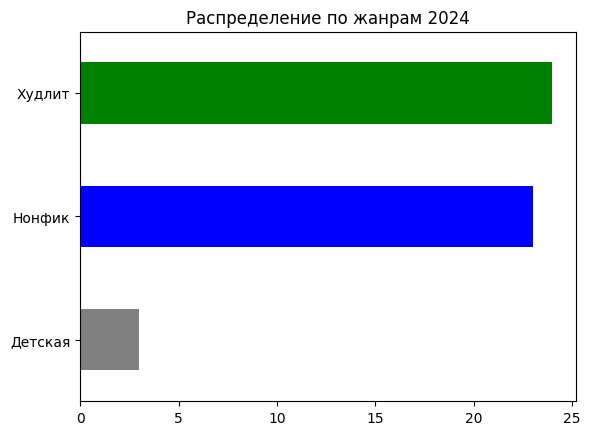

In [14]:
clean_rt_2024['Худлит / Нонфикшн / Детская'].value_counts(ascending=True).plot.barh(
    title='Распределение по жанрам 2024',
    ylabel='',
    color=['Grey','Blue','Green']
);

In [15]:
#Узнаем количество книг для каждого из вышеуказанных жанров в рейтинге за первое полугодие 2025 года: "Худлит","Нонфик" и "Детлит".
clean_rt_2025['Худлит/Нонфик/Детская'].value_counts()

Худлит/Нонфик/Детская
Худлит    26
Нонфик    19
Детлит     5
Name: count, dtype: int64

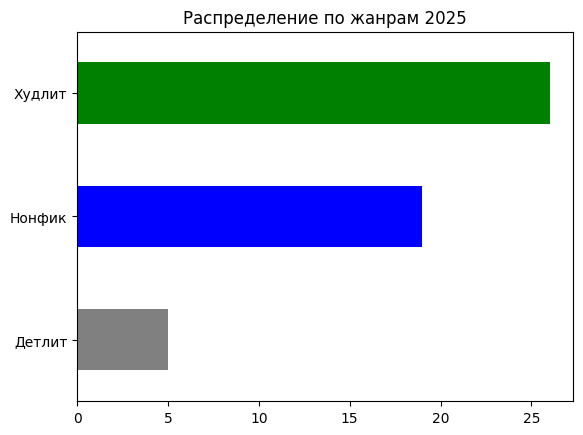

In [16]:
clean_rt_2025['Худлит/Нонфик/Детская'].value_counts(ascending=True).plot.barh(
    title='Распределение по жанрам 2025',
    ylabel='',
    color=['Grey','Blue','Green']
);

<b> В рейтинге ТОП-50 за 2024 г. с небольшим перевесом лидирует жанр "Худлит", в первом полугодии 2025 года ситуация не изменилась, данный жанр лишь упрочил свои позиции.

<h3>Книги зарубежных или отечественных авторов преобладают в рейтинге 2024? Отличается ли ситуация в 2025?

In [17]:
#Определим количество авторов в каждой категории
clean_rt_2024['Зарубежный / Отечественный автор'].value_counts()

Зарубежный / Отечественный автор
Зарубежный       28
Отечественный    22
Name: count, dtype: int64

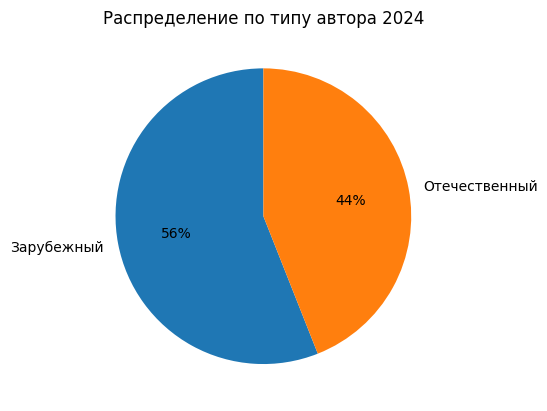

In [18]:
clean_rt_2024['Зарубежный / Отечественный автор'].value_counts().plot.pie(
    title='Распределение по типу автора 2024',
    ylabel='',
    startangle=90,
    autopct='%.0f%%'
);

In [19]:
clean_rt_2025['Зарубежный / Отечественный автор'].value_counts()

Зарубежный / Отечественный автор
Зарубежный       27
Отечественный    23
Name: count, dtype: int64

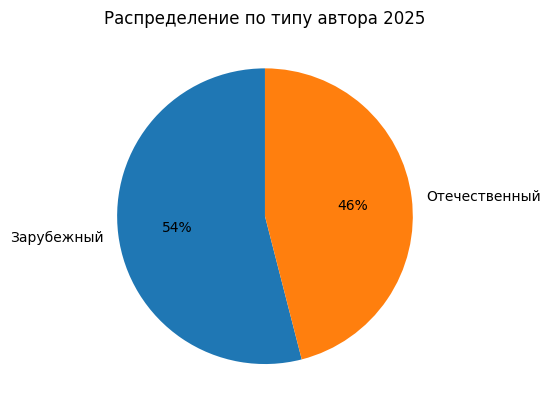

In [20]:
clean_rt_2025['Зарубежный / Отечественный автор'].value_counts().plot.pie(
    title='Распределение по типу автора 2025',
    ylabel='',
    startangle=90,
    autopct='%.0f%%'
);

<b>Зарубежные авторы лидируют с небольшим перевесом в обоих рейтингах ТОП-50, с разницей в одну книгу: 28 в 2024 году и 27 в первом полугодии 2025.

<h3>Какие издательства лидируют в 2024 и 2025?

In [48]:
#Узнаем количество книг для каждого из издательств в рейтинге ТОП-50 2024.
clean_rt_2024['Издательство'].value_counts()

Издательство
Бомбора                 7
АСТ                     6
Комильфо (Эксмо)        5
Эксмо                   5
Clever/Selfpub          4
Альпина                 3
Росмэн                  2
МИФ                     2
Smart Reading           2
Синдбад                 1
Inspiria (Эксмо)        1
Будущее земли           1
Добрая книга            1
София                   1
Весь                    1
Рипол                   1
Азбука                  1
Эксмодетство (Эксмо)    1
Bookwings               1
Азбука / АСТ / Эксмо    1
Питер                   1
Лайвбук/Эвербук         1
Вольный Странник        1
Name: count, dtype: int64

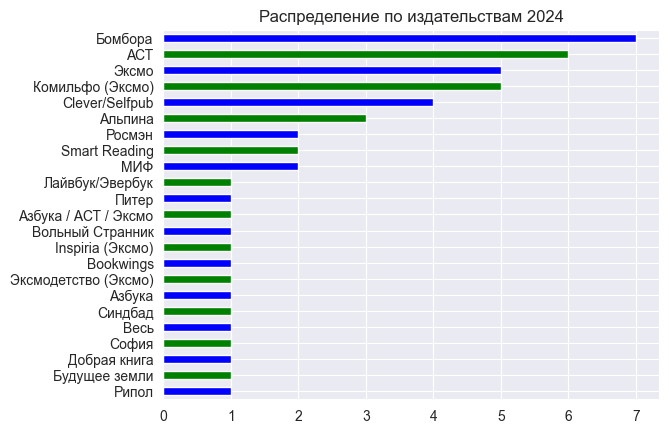

In [22]:
sns.set_style('darkgrid')
clean_rt_2024['Издательство'].value_counts(ascending=True).plot.barh(
    title='Распределение по издательствам 2024',
    ylabel='',
    color=['Blue','Green']
);

In [49]:
#Определим количество книг и издательств для ТОП-50 первой половины 2025.
clean_rt_2025['Издательство'].value_counts()

Издательство
Clever                     8
АСТ                        5
О2                         4
Бомбора                    4
София                      3
Smart Reading              3
Эксмо                      3
Весь                       2
Азбука                     2
Альпина                    2
МИФ                        2
INSPIRIA                   2
Добрая книга               1
Питер                      1
Рипол Классик              1
АСТ / Бомбора / Попурри    1
Черным-бело                1
Иностранка                 1
Bookwings                  1
Манара                     1
БУКВА-ЛЕНД                 1
Харвест                    1
Name: count, dtype: int64

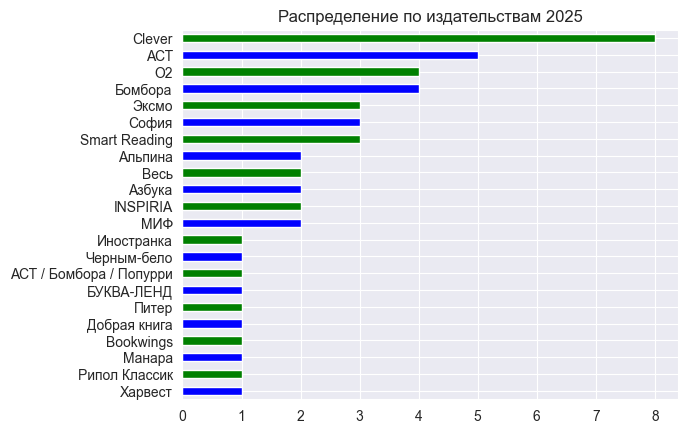

In [24]:
sns.set_style('darkgrid')
clean_rt_2025['Издательство'].value_counts(ascending=True).plot.barh(
    title='Распределение по издательствам 2025',
    ylabel='',
    color=['Blue','Green']
);

<b>По итогам 2024 года лидером среди издательств было издательство Бомбора (7 книг), издательство АСТ на втором месте. В первом полугодии 2025 года ситуация изменилась: первое место занимает Clever (8 книг); Бомбора, в свою очередь, почти в половину снизила своё присутствие в ТОП-50 (4 книги). Издательство АСТ по-прежнему занимает второе место.

<h3>Есть ли книги, занимающие лидирующие позиции 2 года подряд?

In [25]:
#Соединим два df, создав новый (common_books) для книг, которые присутствуют в обоих рейтингах. Уберём ненужные столбцы.
common_books=clean_rt_2024.merge(
    clean_rt_2025,
    how='inner',
    left_on=['Название книги','Автор'],
    right_on=['Название книги','Автор'],).drop(
    ['Зарубежный / Отечественный автор_x','Издательство_x','Издательство_x','Год выпуска',
     'Зарубежный / Отечественный автор_y','Обложка','Издательство_y','Худлит/Нонфик/Детская'],axis=1)
common_books

,Худлит / Нонфикшн / Детская,Автор,Название книги
0,Нонфик,Ольга Примаченко,"К себе нежно. Книга о том, как ценить и беречь..."
1,Нонфик,Джеймс Клир,Атомные привычки. Как приобрести хорошие привы...
2,Худлит,Анна Джейн,Твое сердце будет разбито
3,Худлит,Айн Рэнд,Атлант расправил плечи
4,Нонфик,-,The Book. Как создать цивилизацию заново
5,Нонфик,Борис Зарьков,Менеджмент глазами ресторатора. Как научиться ...
6,Худлит,Анна Джейн,Поклонник
7,Худлит,Анна Джейн,Влюбленная ведьма


In [26]:
#Уточним количество авторов для книг, присутсвующих в обоих рейтингах ТОП-50.
common_books.nunique()

Худлит / Нонфикшн / Детская    2
Автор                          6
Название книги                 8
dtype: int64

<h3>Есть ли авторы, у которых несколько книг в ТОП-50?

In [38]:
#Определим авторов с несколькими книгами в ТОП-50 для 2024 года.
mbooks_author_24=clean_rt_2024.groupby('Автор')['Название книги'].count().sort_values(ascending=False).head()
mbooks_author_24

Автор
Мосян Тунсю         7
Анна Джейн          4
-                   3
Ольга Примаченко    2
Ребекка Яррос       2
Name: Название книги, dtype: int64

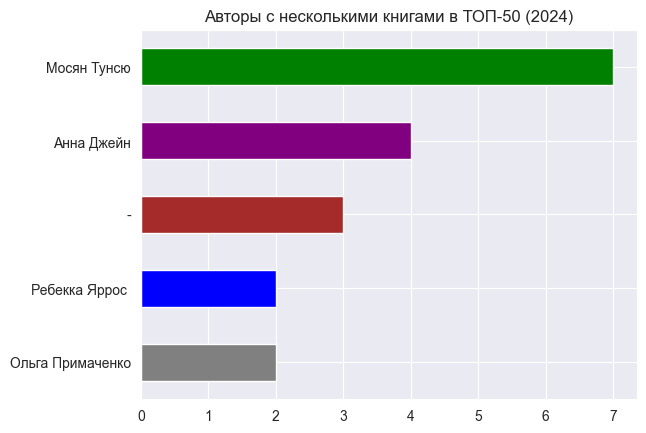

In [28]:
mbooks_author_24.sort_values(ascending=True).plot.barh(
    title='Авторы с несколькими книгами в ТОП-50 (2024)',
    ylabel='',
    color=['Grey','Blue','Brown','Purple','Green']
);

In [39]:
#Найдем авторов с несколькими книгами в рейтинге за первое полугодие 2025 года.
mbooks_author_25=clean_rt_2025.groupby('Автор')['Название книги'].count().sort_values(ascending=False).head(5)
mbooks_author_25

Автор
Анна Джейн       8
-                5
Ребекка Яррос    3
Вадим Зеланд     2
Питер Боланд     2
Name: Название книги, dtype: int64

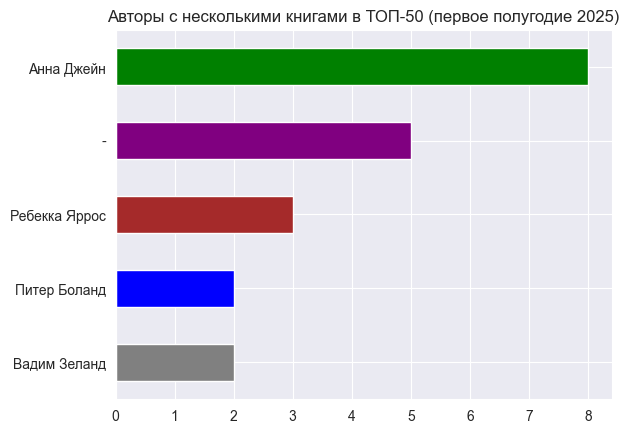

In [30]:
mbooks_author_25.sort_values(ascending=True).plot.barh(
    title='Авторы с несколькими книгами в ТОП-50 (первое полугодие 2025)',
    ylabel='',
    color=['Grey','Blue','Brown','Purple','Green']
);

<b>В рейтинге ТОП-50 2024 года по количеству представленных книг лидирует Мосян Тунсю (7 книг). В первой половине 2025 года автор с наибольшим количеством книг в ТОП-50 - Анна Джейн (8 книг).

<h3><i>Актуальность издания - год выпуска? (только для рейтинга 2024)

In [32]:
#Сгруппируем по году, чтобы узнать самый частый год выпуска в ТОП-50 за 2024 год. 
release_year=clean_rt_2024.groupby('Год выпуска')['Название книги'].count().sort_values(ascending=False)
release_year

Год выпуска
2023    15
2024    10
2021     6
2022     6
2015     4
2020     4
2018     2
2013     1
2017     1
2019     1
Name: Название книги, dtype: int64

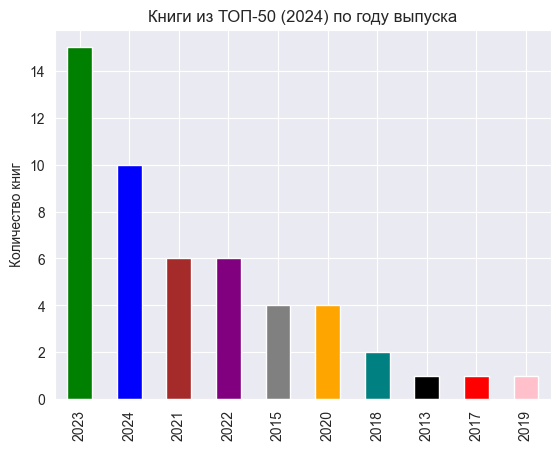

In [37]:
release_year.plot.bar(
    title='Книги из ТОП-50 (2024) по году выпуска',
    xlabel='',
    ylabel='Количество книг',
    color=['Green','Blue','Brown','Purple','Grey','Orange','Teal','Black','Red','Pink']
);

<b>Таким образом, самым частым годом выпуска книг в рейтинге ТОП-50 в 2024 является предшествующий 2023 (15 книг). На втором месте 2024 год с 10 книгами. Замыкают тройку 2021 и 2022 с 6 книгами за каждый. 

<h3><i>Какой тип обложки издания популярен у покупателей? (только для рейтинга 2025)

In [47]:
#Определим количество книг с каждым типом обложки и зададим новый df.
cover_25=clean_rt_2025['Обложка'].value_counts()
cover_25

Обложка
Твердая    42
Мягкая      8
Name: count, dtype: int64

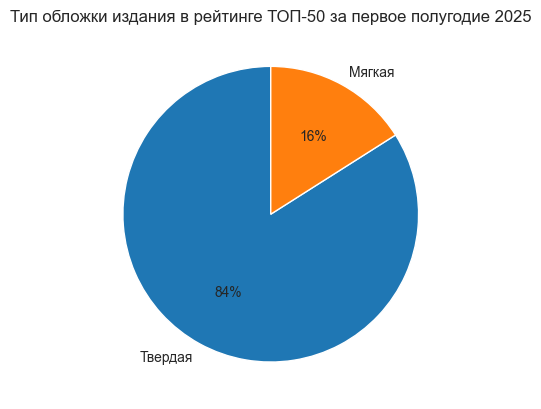

In [46]:
cover_25.plot.pie(
    title='Тип обложки издания в рейтинге ТОП-50 за первое полугодие 2025',
    ylabel='',
    startangle=90,
    autopct='%.0f%%'
);

<b>Как видно из круговой диаграммы, твёрдая обложка является выбором издательств и покупателей в большинстве случаев. 

<b>Таким образом, по результатам сравнительного анализа ТОП-50 самых популярных книг у покупателей за 2024 год и первую половину 2025 года:
- <b><i>Самый популярный жанр (2024/2025) - художественная литература;
- <b><i>Зарубежные авторы лидируют с небольшим перевесом в обоих рейтингах ТОП-50;
- <b><i>Бомбора - лидер среди издательств в 2024 году, Clever в первой половине 2025;
- <b><i>8 книг присутствуют в обоих рейтингах, занимая лидирующие позиции 2 года подряд;
- <b><i>По 5 авторов в каждом рейтинге ТОП-50 представлены несколькими книгами;
- <b><i>2023 - самый частый год выпуска книг в ТОП-50 за 2024 год;
- <b><i>Твёрдая обложка изданий является абсолютным лидером в рейтинге первой половины 2025 года.
